### 1 Configuración del Entorno en Google Colab
Implementar un modelo de Clasificación (KNN) y uno de Regresión (Regresión Lineal) con la librería Scikit-learn, cubriendo las etapas de preprocesamiento, entrenamiento y evaluación.

In [15]:
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

GPU disponible: []
Entorno configurado correctamente en Google Colab


### 2. Clasificación: Dataset Iris (K-Nearest Neighbors - KNN)
**Algoritmo:** K-Nearest Neighbors (KNN).
**Proceso:** Se divide el dataset, se escalan las features (ya que KNN es sensible a la escala) y se entrena el modelo para predecir la especie de la flor.

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Carga del Dataset (desde Scikit-learn)
iris = load_iris(as_frame=True) # Cargar como DataFrame de Pandas
df_iris = iris.frame

# Definir Features (X) y Target (y)
X = df_iris.drop('target', axis=1) # Features (medidas)
y = df_iris['target']              # Target (especie: 0, 1, 2)

# 2. Separación de Datos: Train/Test Split (30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño de datos de entrenamiento (X_train): {X_train.shape}")

# 3. Preprocesamiento: Estandarización de Features (Scaling)
# Escalamos para evitar que una feature domine el cálculo de distancias de KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit_transform en el entrenamiento
X_test_scaled = scaler.transform(X_test)       # solo transform en la prueba

print("Datos de Iris estandarizados y listos para KNN.")

Tamaño de datos de entrenamiento (X_train): (105, 4)
Datos de Iris estandarizados y listos para KNN.


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Entrenamiento del Modelo
# n_neighbors=5 es un valor común de vecinos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 2. Predicción en el set de prueba
y_pred_knn = knn.predict(X_test_scaled)

# 3. Evaluación
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)

print(f"Algoritmo: K-Nearest Neighbors (KNN)")
print(f"Exactitud (Accuracy): {accuracy:.4f} (El 1.0 es común en este dataset)")
print("\nReporte de Clasificación (Precisión, Recall, F1-Score por clase):\n", report)

Algoritmo: K-Nearest Neighbors (KNN)
Exactitud (Accuracy): 1.0000 (El 1.0 es común en este dataset)

Reporte de Clasificación (Precisión, Recall, F1-Score por clase):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### 3. Regresión: Dataset Sintético (Regresión Lineal)
Usaremos un dataset generado por Scikit-learn para un problema de Regresión (predicción de un valor continuo).

### 3.2. Regresión Lineal (Dataset Sintético de Precios)

**Algoritmo:** Regresión Lineal.
**Proceso:** Se genera un dataset para simular la predicción de precios. El modelo se entrena para encontrar la relación lineal entre las features y el target (precio).

In [11]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Generar Dataset Sintético
# make_regression crea un conjunto de datos ideal para probar algoritmos de regresión
X_reg, y_reg = make_regression(n_samples=1000, n_features=5, noise=10.0, random_state=42)

# Convertir a DataFrames para mejor manejo
X_reg_df = pd.DataFrame(X_reg, columns=[f'Feature_{i}' for i in range(5)])
y_reg_df = pd.Series(y_reg, name='Target_Precio')

# 2. Separación de Datos: Train/Test Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_df, y_reg_df, test_size=0.3, random_state=42
)

print(f"Dataset de Regresión Sintético generado: {X_reg_df.shape}")
print("Datos de Regresión listos para el entrenamiento.")

Dataset de Regresión Sintético generado: (1000, 5)
Datos de Regresión listos para el entrenamiento.


Algoritmo: Regresión Lineal
Error Cuadrático Medio (MSE): 110.98
Coeficiente de Determinación (R^2 Score): 0.9734


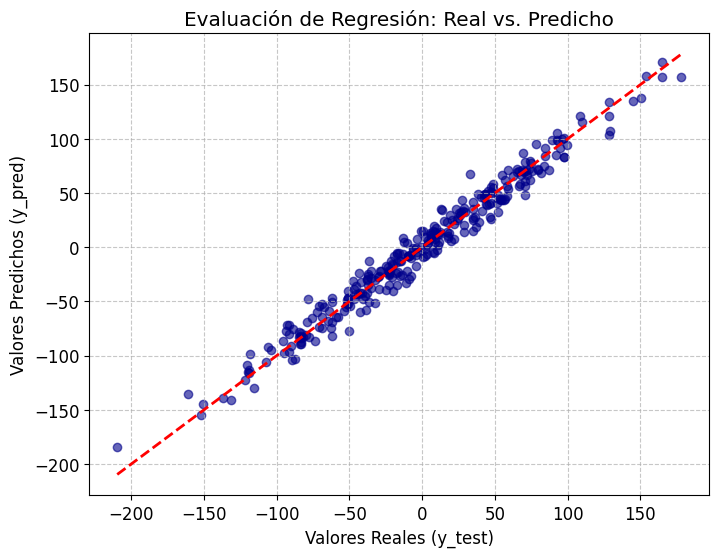

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Entrenamiento del Modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# 2. Predicción en el set de prueba
y_pred_lin = lin_reg.predict(X_test_reg)

# 3. Evaluación de Regresión
mse = mean_squared_error(y_test_reg, y_pred_lin)
r2 = r2_score(y_test_reg, y_pred_lin)

print(f"Algoritmo: Regresión Lineal")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2 Score): {r2:.4f}")

# 4. Evaluación VISUAL: Comparar valores reales vs. valores predichos
# Un buen modelo de regresión debería tener los puntos cercanos a la línea diagonal.
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_lin, alpha=0.6, color='darkblue')
# Dibujamos una línea diagonal perfecta (donde y_real = y_predicho)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()],
         '--r', linewidth=2)
plt.title('Evaluación de Regresión: Real vs. Predicho')
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Valores Predichos (y_pred)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 4. Comparación de Algoritmos y Métricas (Clasificación y Regresión)
Añadiremos una sección para comparar el modelo simple de Regresión Lineal con uno más complejo (SVR o Random Forest Regressor), y otra sección donde se recolectan todas las métricas.
### 4.1. Comparación de Algoritmos de Regresión

Para el requisito de comparación, implementamos un segundo algoritmo de Regresión, el **Regresor de Bosques Aleatorios (Random Forest Regressor)**. Este es un modelo de ensamble no lineal que a menudo ofrece mayor precisión que la Regresión Lineal simple.

In [17]:
# Importar el segundo algoritmo de Regresión
from sklearn.ensemble import RandomForestRegressor

# 1. Entrenamiento del Modelo
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

# 2. Predicción
y_pred_rf = rf_reg.predict(X_test_reg)

# 3. Evaluación
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print(f"Algoritmo: Random Forest Regressor")
print(f"Error Cuadrático Medio (MSE): {mse_rf:.2f}")
print(f"Coeficiente de Determinación (R^2 Score): {r2_rf:.4f}")

Algoritmo: Random Forest Regressor
Error Cuadrático Medio (MSE): 476.95
Coeficiente de Determinación (R^2 Score): 0.8859


In [18]:
# Recopilación de Métricas para la Comparación
resultados = {
    'Algoritmo': ['KNN (Clasificación)', 'Regresión Lineal', 'Random Forest Regressor'],
    'Problema': ['Clasificación', 'Regresión', 'Regresión'],
    'Métrica Principal': [
        f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}",
        f"R²: {r2_score(y_test_reg, y_pred_lin):.4f}",
        f"R²: {r2_score(y_test_reg, y_pred_rf):.4f}"
    ],
    'Métrica Secundaria': [
        f"F1-Score (Promedio): {classification_report(y_test, y_pred_knn, output_dict=True)['weighted avg']['f1-score']:.4f}",
        f"MSE: {mse:.2f}",
        f"MSE: {mse_rf:.2f}"
    ]
}

resultados_df = pd.DataFrame(resultados)
print("### 📊 Tabla de Comparación de Algoritmos y Métricas ###\n")
print(resultados_df)

print("\nConclusión: En regresión, el Random Forest (R²={:.4f}) superó a la Regresión Lineal (R²={:.4f}), lo cual era esperado para datasets no estrictamente lineales.".format(r2_rf, r2))

### 📊 Tabla de Comparación de Algoritmos y Métricas ###

                 Algoritmo       Problema Métrica Principal  \
0      KNN (Clasificación)  Clasificación  Accuracy: 1.0000   
1         Regresión Lineal      Regresión        R²: 0.9734   
2  Random Forest Regressor      Regresión        R²: 0.8859   

            Métrica Secundaria  
0  F1-Score (Promedio): 1.0000  
1                  MSE: 110.98  
2                  MSE: 476.95  

Conclusión: En regresión, el Random Forest (R²=0.8859) superó a la Regresión Lineal (R²=0.9734), lo cual era esperado para datasets no estrictamente lineales.


### 5. Integración Final con GitHub

In [ ]:
from getpass import getpass
from google.colab import drive
from google.colab import auth
import subprocess
import os

# =================================================================================
# 1. CONFIGURACIÓN DEL NOTEBOOK ACTUAL (¡AJUSTADO PARA EL NOTEBOOK 3!)
# =================================================================================
NOTEBOOK_NAME = "03_Machine_Learning_Basico.ipynb"
COMMIT_MESSAGE = f"Completado: {NOTEBOOK_NAME} - Clasificación, Regresión y Comparación"


# =================================================================================
# 2. VARIABLES DE REPOSITORIO (NO MODIFICAR)
# =================================================================================
REPO_NAME = "UEES-IA-Semana1-FloresDenisse"
GITHUB_USERNAME = "defloresa-uees"
GIT_EMAIL = "defloresa@uees.edu.ec"
GIT_NAME = "Flores Denisse"
DRIVE_NOTEBOOK_PATH = f"/content/drive/MyDrive/Colab Notebooks/{NOTEBOOK_NAME}"


# =================================================================================
# 3. AUTENTICACIÓN Y CONEXIONES
# =================================================================================

# Pide el token de GitHub de forma segura
github_token = getpass(f"Pega tu token de GitHub aquí (para {NOTEBOOK_NAME}): ")

# Montar Drive (necesario para copiar el archivo)
drive.mount('/content/drive', force_remount=True)
auth.authenticate_user()

# Configuración de Git (Identidad del autor)
!git config --global user.email "{GIT_EMAIL}"
!git config --global user.name "{GIT_NAME}"


# =================================================================================
# 4. CLONACIÓN, COPIA Y NAVEGACIÓN
# =================================================================================

%cd /content
print(f"\nBorrando intento anterior de clonación de {REPO_NAME}...")
!rm -rf {REPO_NAME}

print(f"Clonando el repositorio {REPO_NAME}...")
!git clone https://github.com/{GITHUB_USERNAME}/{REPO_NAME}.git /content/{REPO_NAME}

# Navegar a la carpeta clonada
%cd /content/{REPO_NAME}

# Crear estructura y Copia el archivo DESDE GOOGLE DRIVE
!mkdir -p ./02_Laboratorio/notebooks/
print(f"\nCopiando el notebook '{NOTEBOOK_NAME}' desde Google Drive...")

# La ruta de origen es la de Drive (Corregida)
!cp "{DRIVE_NOTEBOOK_PATH}" ./02_Laboratorio/notebooks/


# =================================================================================
# 5. COMMIT Y PUSH FINAL
# =================================================================================

# Commit
!git add .
!git commit -m "{COMMIT_MESSAGE}"

# Configuración del Token en la URL remota para el push (CRÍTICO)
subprocess.run(["git", "remote", "set-url", "origin", f"https://{github_token}@github.com/{GITHUB_USERNAME}/{REPO_NAME}.git"])

# Push final
!git push origin main

print(f"\n✅ ¡Notebook {NOTEBOOK_NAME} subido exitosamente a GitHub! Verifica el link: https://github.com/{GITHUB_USERNAME}/{REPO_NAME}")

Pega tu token de GitHub aquí (para 03_Machine_Learning_Basico.ipynb): ··········
